In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Major/Covid19_India.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30.0,1.0,2020.0
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2.0,2.0,2020.0
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3.0,2.0,2020.0
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2.0,3.0,2020.0
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2.0,3.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...
556887,7039,1.0,07/03/2021,NaN,NaN,NaN,Lucknow,Uttar Pradesh,Deceased,7.0,3.0,2021.0
556888,7040,1.0,07/03/2021,NaN,NaN,NaN,Sonbhadra,Uttar Pradesh,Deceased,7.0,3.0,2021.0
556889,7041,1.0,07/03/2021,NaN,NaN,NaN,Fatehpur,Uttar Pradesh,Deceased,7.0,3.0,2021.0
556890,7042,1.0,07/03/2021,NaN,NaN,NaN,Auraiya,Uttar Pradesh,Deceased,7.0,3.0,2021.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556892 entries, 0 to 556891
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         556892 non-null  int64  
 1   Num Cases          556873 non-null  float64
 2   Date Announced     556885 non-null  object 
 3   Age Bracket        119491 non-null  object 
 4   Gender             123835 non-null  object 
 5   Detected City      16616 non-null   object 
 6   Detected District  541198 non-null  object 
 7   Detected State     556869 non-null  object 
 8   Current Status     556879 non-null  object 
 9   Day                556885 non-null  float64
 10  Month              556885 non-null  float64
 11  Year               556885 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 51.0+ MB


In [ ]:
data=df.iloc[:,1:]
data.head(20)

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30.0,1.0,2020.0
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2.0,2.0,2020.0
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3.0,2.0,2020.0
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2.0,3.0,2020.0
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2.0,3.0,2020.0
5,1.0,03/03/2020,69,M,Jaipur,Italians,Rajasthan,Recovered,3.0,3.0,2020.0
6,1.0,04/03/2020,55,NaN,Gurugram,Italians,Haryana,Recovered,4.0,3.0,2020.0
7,1.0,04/03/2020,55,NaN,Gurugram,Italians,Haryana,Recovered,4.0,3.0,2020.0
8,1.0,04/03/2020,55,NaN,Gurugram,Italians,Haryana,Recovered,4.0,3.0,2020.0
9,1.0,04/03/2020,55,NaN,Gurugram,Italians,Haryana,Recovered,4.0,3.0,2020.0


In [ ]:
data.isnull()

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,False
2,False,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
556887,False,False,True,True,True,False,False,False,False,False,False
556888,False,False,True,True,True,False,False,False,False,False,False
556889,False,False,True,True,True,False,False,False,False,False,False
556890,False,False,True,True,True,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

Num Cases                19
Date Announced            7
Age Bracket          437401
Gender               433057
Detected City        540276
Detected District     15694
Detected State           23
Current Status           13
Day                       7
Month                     7
Year                      7
dtype: int64

In [ ]:
round(data.isnull().sum(axis=0).sort_values(ascending=False)/len(data)*100,4)

Detected City        97.0163
Age Bracket          78.5432
Gender               77.7632
Detected District     2.8181
Detected State        0.0041
Num Cases             0.0034
Current Status        0.0023
Year                  0.0013
Month                 0.0013
Day                   0.0013
Date Announced        0.0013
dtype: float64

In [ ]:
data.isnull().sum(axis=1).sort_values(ascending=False)

422317    11
242262    11
288843    11
422316    11
422318    11
          ..
122640     0
122639     0
122638     0
122637     0
0          0
Length: 556892, dtype: int64

In [ ]:
data.groupby(["Month","Year"])['Num Cases'].sum()

Month  Year  
1.0    2020.0          2.0
       2021.0    1031650.0
2.0    2020.0          4.0
       2021.0     706823.0
3.0    2020.0       3267.0
       2021.0     214260.0
4.0    2020.0      51749.0
5.0    2020.0     242853.0
6.0    2020.0     663181.0
7.0    2020.0    1878471.0
8.0    2020.0    3761763.0
9.0    2020.0    5088546.0
10.0   2020.0    4116679.0
11.0   2020.0    2695136.0
12.0   2020.0    1828219.0
Name: Num Cases, dtype: float64

In [ ]:
M=data[data['Current Status']=='Hospitalized'].groupby(["Month","Year"])['Num Cases'].sum()
M

Month  Year  
1.0    2021.0     472317.0
2.0    2021.0     353425.0
3.0    2020.0       2862.0
       2021.0     117215.0
4.0    2020.0      48856.0
5.0    2020.0     155781.0
6.0    2020.0     395143.0
7.0    2020.0    1111263.0
8.0    2020.0    1990888.0
9.0    2020.0    2622324.0
10.0   2020.0    1873130.0
11.0   2020.0    1279860.0
12.0   2020.0     823056.0
Name: Num Cases, dtype: float64

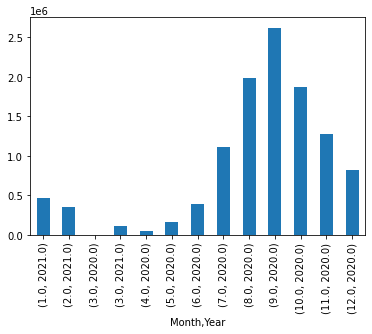

In [ ]:
M.plot.bar()
plt.show()

In [ ]:
data['Gender']=data['Gender'].replace(['M,'],['M'])
data['Gender']=data['Gender'].replace(['M '],['M'])
data['Gender']=data['Gender'].replace(['Femal e'],['F'])

In [ ]:
G=data.groupby('Gender')['Num Cases'].sum()
G

Gender
F             43192.0
M             82268.0
Non-Binary       18.0
Name: Num Cases, dtype: float64

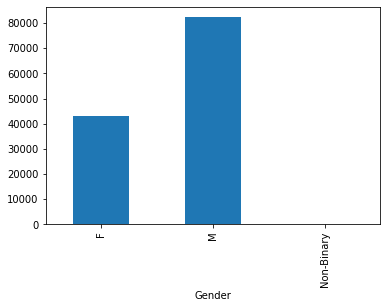

In [ ]:
G.plot.bar()
plt.show()

In [ ]:
data['Age Bracket']=data['Age Bracket'].replace(['40'],['40.0'])
data['Age Bracket']=data['Age Bracket'].replace(['30'],['30.0'])
data['Age Bracket']=data['Age Bracket'].replace(['35'],['35.0'])
data['Age Bracket']=data['Age Bracket'].replace(['45'],['45.0'])
data['Age Bracket']=data['Age Bracket'].replace(['25'],['25.0'])
data['Age Bracket']=data['Age Bracket'].replace(['32'],['32.0'])
data['Age Bracket']=data['Age Bracket'].replace(['28'],['28.0'])
data['Age Bracket']=data['Age Bracket'].replace(['26'],['26.0'])
data['Age Bracket']=data['Age Bracket'].replace(['55'],['55.0'])
data['Age Bracket']=data['Age Bracket'].replace(['50'],['50.0'])

In [ ]:
A=data.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False).head(10)
A

Age Bracket
30.0    3749.0
40.0    3390.0
35.0    3382.0
45.0    3181.0
25.0    3120.0
32.0    3048.0
28.0    2921.0
26.0    2742.0
50.0    2721.0
55.0    2630.0
Name: Num Cases, dtype: float64

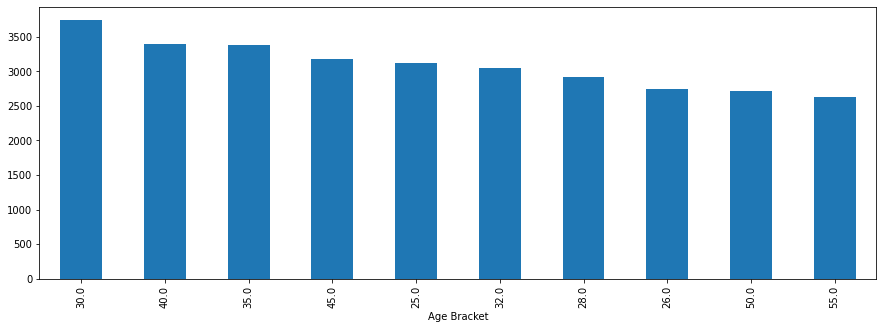

In [ ]:
A.plot.bar(figsize=(15,5))
plt.show()

In [ ]:
S=data[data['Current Status']=='Hospitalized'].groupby(["Detected State"])['Num Cases'].sum().sort_values(ascending=False)
S

Detected State
Maharashtra                                 2223899.0
Kerala                                      1077608.0
Karnataka                                    955261.0
Andhra Pradesh                               891335.0
Tamil Nadu                                   856584.0
Delhi                                        643096.0
Uttar Pradesh                                605361.0
West Bengal                                  576921.0
Odisha                                       337803.0
Rajasthan                                    323002.0
Chhattisgarh                                 314340.0
Telangana                                    300754.0
Gujarat                                      275119.0
Haryana                                      272746.0
Madhya Pradesh                               266044.0
Bihar                                        262852.0
Assam                                        217703.0
Punjab                                       188631.0
Jammu and Kas

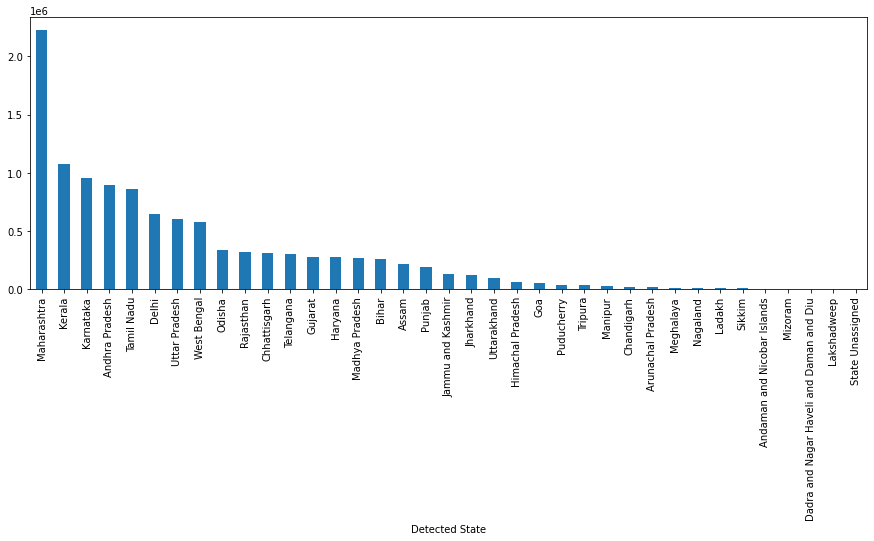

In [ ]:
S.plot.bar(figsize=(15,5))
plt.show()

In [ ]:
Day=data[data['Current Status']=='Hospitalized'].groupby(["Month","Day","Year"])['Num Cases'].sum()
Day

Month  Day   Year  
1.0    1.0   2021.0    20159.0
       2.0   2021.0    18144.0
       3.0   2021.0    16678.0
       4.0   2021.0    16278.0
       5.0   2021.0    17909.0
                        ...   
12.0   27.0  2020.0    20333.0
       28.0  2020.0    16072.0
       29.0  2020.0    20542.0
       30.0  2020.0    21945.0
       31.0  2020.0    19026.0
Name: Num Cases, Length: 367, dtype: float64

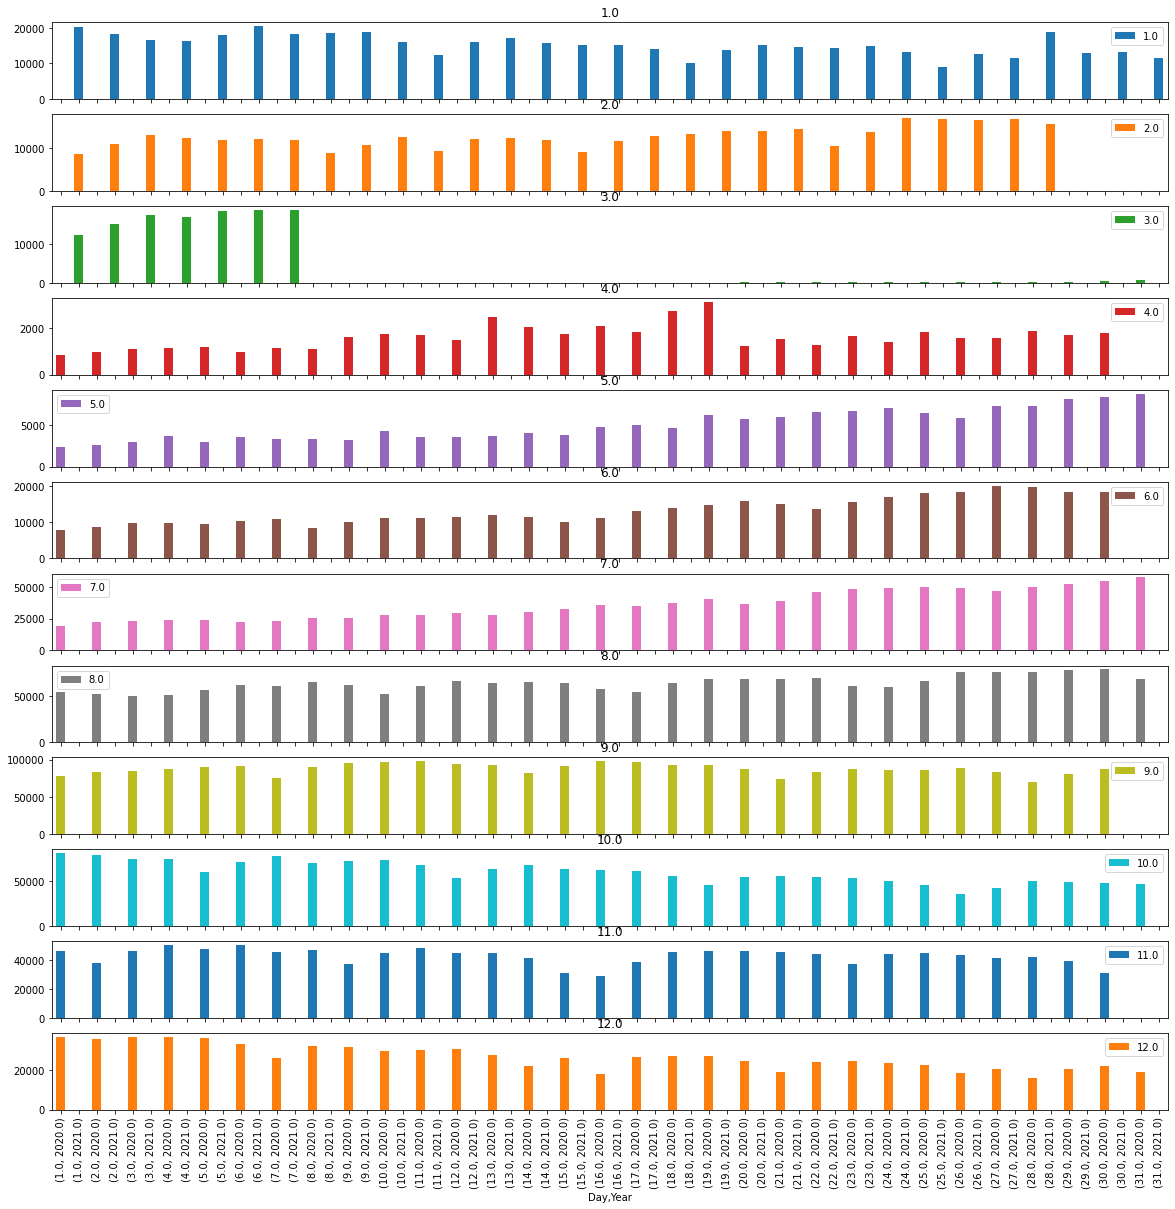

In [ ]:
Day.unstack(level=0).plot(kind='bar',subplots=True,figsize=(20,20))
plt.show()

In [ ]:
data['Current Status'].unique()

array(['Recovered', 'Hospitalized', 'Deceased', 'Migrated',
       'Migrated_Other', nan, 'Migrated_other', 'hospitalized'],
      dtype=object)

In [ ]:
data[data['Current Status']=='Deceased']